# ANU ASTR4004 2025 - Week 4 (12+14 August 2025): Preprocessing Data

Author: Dr Sven Buder (sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-yourself" data-toc-modified-id="Time-yourself-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time yourself</a></span></li><li><span><a href="#Preprocessing-of-Data-Files" data-toc-modified-id="Preprocessing-of-Data-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing of Data Files</a></span><ul class="toc-item"><li><span><a href="#Creating-data-directories-and-downloading-files" data-toc-modified-id="Creating-data-directories-and-downloading-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating data directories and downloading files</a></span></li><li><span><a href="#Reading-CSV-(Comma-Separated-Values)-Files" data-toc-modified-id="Reading-CSV-(Comma-Separated-Values)-Files-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reading CSV (Comma Separated Values) Files</a></span></li><li><span><a href="#FITS-Images-(the-I-in-Flexible-Image-Transport-System)" data-toc-modified-id="FITS-Images-(the-I-in-Flexible-Image-Transport-System)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>FITS Images (the I in Flexible Image Transport System)</a></span><ul class="toc-item"><li><span><a href="#Metadata:-store-useful-information-about-your-tables" data-toc-modified-id="Metadata:-store-useful-information-about-your-tables-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Metadata: store useful information about your tables</a></span></li><li><span><a href="#The-world-coordinate-system-at-your-fingertips" data-toc-modified-id="The-world-coordinate-system-at-your-fingertips-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>The world coordinate system at your fingertips</a></span></li></ul></li></ul></li><li><span><a href="#Working-with-Data-Catalogues" data-toc-modified-id="Working-with-Data-Catalogues-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with Data Catalogues</a></span><ul class="toc-item"><li><span><a href="#Downloading-Data-via-ADQL/SQL" data-toc-modified-id="Downloading-Data-via-ADQL/SQL-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Downloading Data via ADQL/SQL</a></span></li><li><span><a href="#Joining-2-catalogues" data-toc-modified-id="Joining-2-catalogues-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Joining 2 catalogues</a></span></li><li><span><a href="#Cleaning-Catalogues" data-toc-modified-id="Cleaning-Catalogues-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cleaning Catalogues</a></span></li><li><span><a href="#Scaling-entries-(e.g.-for-fitting)" data-toc-modified-id="Scaling-entries-(e.g.-for-fitting)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Scaling entries (e.g. for fitting)</a></span></li><li><span><a href="#Visualising-targets-with-ipyaladin" data-toc-modified-id="Visualising-targets-with-ipyaladin-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Visualising targets with ipyaladin</a></span></li></ul></li><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpolation</a></span></li></ul></div>

If you want to get an automatic Table of Contents as above and codefolding, you can install notebook extensions for jupyter:

```bash
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
```

Then navigate to the "Nbextensions" bar when you start Jupyter and look for "Table of Contents (2)" as well as "Codefolding"  
Note: You might have to tweak a few setting to avoid numbering Notebook headers like the one above

In [65]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Time yourself

In [66]:
from functools import wraps
import time

def timeit(func):
    """Prints the runtime of decorated functions"""
    @wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer

@timeit
def waste_some_time(num_times):
    for _ in range(num_times):
        sum([i**2 for i in range(10000)])

waste_some_time(999)

Finished 'waste_some_time' in 2.1615 secs


## Preprocessing of Data Files

Different researchers (and industries) prefer different data formats and even in astronomy you will encounter most of the following files:

| Name   | File Ending | Advantages                                                                 | Encounter | How to Read with Python                       |
|--------|-------------|---------------------------------------------------------------------------|-|----------------------------------------------------|
| Excel  | .xlsx       | User-friendly,<br>supports formatting,<br>widely used in business.      | Collaboration spreadsheets | `pandas.read_excel('file.xlsx')` |
| CSV    | .csv        | Lightweight,<br>human-readable,<br>easily imported/exported,<br>universal format.    | CDS VizieR | `pandas.read_csv('file.csv')`                           |
| FITS   | .fits       | Optimized for astronomy data,<br>supports metadata,<br>handles large datasets.    | Astronomy Survey Images and Catalogues | `table = astropy.table.Table.read('file.fits)`<br>`table.to_pandas()`     |
| HDF5   | .hdf5  | Efficient storage for large, complex datasets,<br>supports metadata,<br>fast I/O. | Astronomy Simulations | `pandas.read_hdf('file.h5', key='data')`                |
| Xarray | .nc         | Handles labeled n-dimensional arrays,<br>integrates with Dask for big data,<br>Well tested on TB-scale in climate modelling.    | Future Simulations/Observations? | `xarray.load_dataarray('file.nc')` |


The above table gives you a very incomplete idea of the vast amount of table formats out there. As our measurement and simulation data increases, we will move downwards. The last two file types allow you to only read in columns/rows of files or only their metadata - great if you only care about a small part in a terra-byte large file!

Currently, most astronomers are *stuck* in the lower middle of the chart - including myself. Because I work a lot with `FITS` files, I usually work with`astropy.table`.  

In terms of python packages, `pandas` is widely used in astronomy and data science. 
Switching between them is not super-difficult, so I will try to show you examples of both.

In [67]:
import pandas as pd
from astropy.table import Table # this works well for FITS data catalogues
from astropy.io import fits # this is your more agnostic way to work for FITS images

### Creating data directories and downloading files 

You might need to download a file (if you have not already).

The `os` package comes in handy, because it allows you to check if a file or directory exists, and even create a directory if necessary!

In [68]:
import os

# Check if 'data' directory exists, if not, create it
if not os.path.exists('data'):
    os.makedirs('data')

# You can also check if a specific file exists
file_path = 'data/reduced_TAN_C14.fits'

if not os.path.exists(file_path):
    try:
        # Download the file from a URL, if it does not exist
        import wget
        wget.download(
            url='http://data.astropy.org/tutorials/FITS-cubes/reduced_TAN_C14.fits',
            out=file_path
        )
    except Exception as e:
        raise RuntimeError(f"Could not download FITS file: {e}")

### Reading CSV (Comma Separated Values) Files

In [69]:
# Option 1: Pandas
galah_data = pd.read_csv('data/galah_dr3_allstar_m67_lite.csv')
galah_data[:5] # let's just display the first 5 rows

,tmass_id,sobject_id,dr3_source_id,flag_sp,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,snr_c2_iraf
0,08520715+1149254,131217003901002,604906737317927296,0,6025.8040,82.919060,4.154162,0.182165,-0.092624,0.070014,0,48.859188
1,08512296+1149131,131217003901022,604917732434325248,0,6415.1600,84.775009,4.209819,0.182216,-0.084781,0.092447,0,43.781768
2,08513012+1143498,131217003901063,604910310730772992,1,5991.9200,82.115155,3.980560,0.196921,-0.072373,0.068488,0,49.728881
3,08512033+1145523,131217003901081,604911341522929536,0,6007.7817,80.506650,3.973353,0.186000,-0.122556,0.064773,0,55.569531
4,08514268+1146365,131217003901110,604916731706106752,0,5718.2666,75.889717,4.008145,0.179610,-0.702105,0.055919,0,81.991700


In [70]:
# Option 2: Astropy
galah_data = Table.read('data/galah_dr3_allstar_m67_lite.csv')
galah_data[:5] # let's just display the first 5 rows

tmass_id,sobject_id,dr3_source_id,flag_sp,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,snr_c2_iraf
str16,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64
08520715+1149254,131217003901002,604906737317927296,0,6025.804,82.91905965852722,4.1541624,0.18216475987029215,-0.09262371,0.07001416519071464,0,48.8591878178
08512296+1149131,131217003901022,604917732434325248,0,6415.16,84.7750087963104,4.2098193,0.18221560714532228,-0.08478117,0.09244745268009283,0,43.7817682318
08513012+1143498,131217003901063,604910310730772992,1,5991.92,82.11515545187801,3.9805598,0.1969210017938334,-0.07237339,0.06848785671379515,0,49.7288811238
08512033+1145523,131217003901081,604911341522929536,0,6007.7817,80.50664999999921,3.9733527,0.1859996020339389,-0.12255621,0.06477301699757515,0,55.5695313006
08514268+1146365,131217003901110,604916731706106752,0,5718.2666,75.88971743000845,4.0081453,0.179609942164367,-0.70210457,0.055918992523516536,0,81.9917002005


### FITS Images (the I in Flexible Image Transport System)

also check out the astropy tutorials: https://learn.astropy.org/tutorials/FITS-cubes.html

#### Metadata: store useful information about your tables

Here, we will work with a FITS file from the Radio astronomy survey HI4PI.  
The specific region of the sky that was observed in this tile (C14) is the Small Magellanic Cloud (SMC).

In [71]:
# FITS Images
fits_file = fits.open('data/reduced_TAN_C14.fits')
print(fits_file)

In [72]:
#fits_file is now a list of objects, each one corresponding to a different extension
print('This file has {0} extensions.'.format(len(fits_file)))

This file has 1 extensions.


In [73]:
#we can also just dump information for this fits file
print(fits_file.info())

Filename: data/reduced_TAN_C14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (150, 150, 450)   float32   
None


In [74]:
#print the header for the Primary Extension
print(fits_file[0].header.items)

<bound method Header.items of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  150                                                  
NAXIS2  =                  150                                                  
NAXIS3  =                  450                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                 

In [75]:
# Try-except: your helper if you think something might fail
try:
    # try to read out data and header
    fits_data = fits_file[0].data
    fits_header = fits_file[0].header

except:
    print('fits_file was not yet open. Opening it now...')
    # this might have failed, if you have closed the fits_file and execute this cell out of order
    fits_file = fits.open('data/reduced_TAN_C14.fits')
    fits_data = fits_file[0].data
    fits_header = fits_file[0].header
    
# don't forget to close the fits_file to free up memory
fits_file.close()

#### The world coordinate system at your fingertips

In [76]:
# The pixels are reported in Galactic longitude and latitude
# Imagine you want to translate to Right Ascension and Declination?

# GLON and GLAT come in AXIS1 and AXIS2
naxis1 = fits_header['NAXIS1']  # Number of pixels along the 1st axis
naxis2 = fits_header['NAXIS2']  # Number of pixels along the 2nd axis

# It is good practice to report FITS measurements in an agreed reference frame, 
# the World Coordinate System (WCS)
from astropy.wcs import WCS
wcs = WCS(fits_header, naxis=2)

In [77]:
# Imagine you want to just zoom in onto the SMC: 
import astropy.units as u

# Define the desired latitude and longitude range
lat_range = [-46, -40] * u.deg  # GLAT range
lon_range = [306, 295] * u.deg  # GLON range

# Using the WCS object to convert world coordinates (GLON, GLAT) to pixel coordinates

# Convert (GLON_min, GLAT_min) and (GLON_max, GLAT_max) to pixel coordinates
glon_min_pix, glat_min_pix = wcs.world_to_pixel_values(lon_range[0], lat_range[0])  # Lower-left corner
glon_max_pix, glat_max_pix = wcs.world_to_pixel_values(lon_range[1], lat_range[1])  # Upper-right corner

# Convert to integer pixel coordinates for slicing
glon_min_pix = int(np.floor(glon_min_pix))
glon_max_pix = int(np.ceil(glon_max_pix))
glat_min_pix = int(np.floor(glat_min_pix))
glat_max_pix = int(np.ceil(glat_max_pix))

sub_wcs = wcs.deepcopy()  # Make a copy of the original WCS
sub_wcs.wcs.crpix[0] -= glon_min_pix  # Adjust reference pixel for GLON
sub_wcs.wcs.crpix[1] -= glat_min_pix  # Adjust reference pixel for GLAT

sub_data_cube = fits_data[:, glat_min_pix:glat_max_pix, glon_min_pix:glon_max_pix] * u.K

In [78]:
# Let's estimate the 0th and 1st Moments, i.e. Intensity Map and Intensity-weighted Velocity Map 

cdelt3 = fits_header['CDELT3'] * u. m / u.s  # Velocity increment per channel (e.g., km/s)
crval3 = fits_header['CRVAL3'] * u. m / u.s  # Velocity value at the reference pixel
crpix3 = fits_header['CRPIX3']  # Reference pixel (1-based index in FITS)

# Create the velocity axis (1D array for velocity channels)
n_channels = sub_data_cube.shape[0]  # Number of velocity channels
velocity_axis = ((np.arange(n_channels) - (crpix3 - 1)) * cdelt3 + crval3)

# Select velocity between -300 and 300 km/s
velocity_select = (velocity_axis > -300 * u.km/u.s) & (velocity_axis < 302 * u.km/u.s)

# Calculate the zeroth moment: integral of I delta_v = sum(I * cdelt3)
intensity_sum = np.nansum(sub_data_cube[velocity_select,:,:], axis=0) * cdelt3

# Calculate the first moment (intensity-weighted mean velocity)
# i.e. weighted sum of velocities / sum of intensities

# Weighted sum of velocities = sum(I * velocity-center * cdelt3)
# Note: velocity center has to be offset by half a bin from velocity_axis
weighted_velocity_sum = np.nansum(sub_data_cube[velocity_select,:,:] * (velocity_axis[velocity_select, np.newaxis, np.newaxis] + 0.5 * cdelt3) * cdelt3, axis=0)

# Calculate the first moment (intensity-weighted mean velocity)
intensity_weighted_mean_velocity = np.where(intensity_sum > 0, weighted_velocity_sum / intensity_sum, np.nan)

# Convert Intensity sum to a Column Density assuming optically thin media
# Following Eq. (2) of this paper: https://www.aanda.org/articles/aa/pdf/2016/10/aa29178-16.pdf
hi_column_density = (intensity_sum * 1.823 * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km).to(1/u.cm**2)

If you want to read more about this, check out the HI4PI paper: https://ui.adsabs.harvard.edu/abs/2016A%26A...594A.116H/abstract  
(or ask Naomi McClure-Griffiths here at ANU, one of the co-authors, and lead of the Parkes Radio observations of this amazing project)

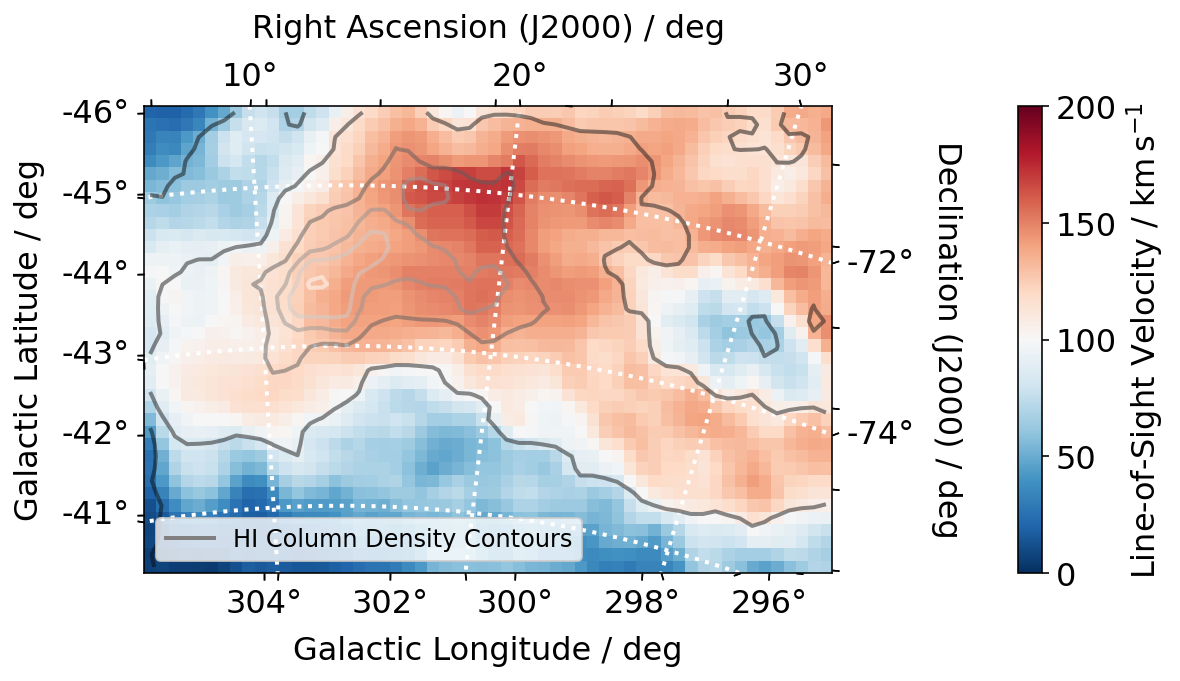

In [79]:
# Let's do some fun plotting! 

fig, ax = plt.subplots(1,1,figsize=(10, 5),subplot_kw={'projection': sub_wcs})

# image = ax.imshow(data_slice, origin='lower', cmap='RdBu_r', aspect='auto')
image = ax.imshow(intensity_weighted_mean_velocity.to(u.km/u.s).value, origin='lower', cmap='RdBu_r', vmin=0, vmax=200)

# Add a colorbar
cbar = plt.colorbar(image, pad = 0.15)
cbar.set_label(r'Line-of-Sight Velocity / $\mathrm{km\,s^{-1}}$', size=16)

# Add axes labels
ax.set_xlabel("Galactic Longitude / deg", fontsize=16)
ax.set_ylabel("Galactic Latitude / deg", fontsize=16)
ax.set_ylim(ax.get_ylim()[::-1])

# Overplot column density contours 
levels = (1e20, 5e20, 1e21, 3e21, 5e21, 7e21, 1e22)  # Define contour levels to use
ax.contour(hi_column_density.value, cmap='Greys_r', alpha=0.5, levels=levels)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
overlay[0].set_axislabel('Right Ascension (J2000) / deg', fontsize=16)
overlay[1].set_axislabel('Declination (J2000) / deg', fontsize=16)

contour_legend = matplotlib.lines.Line2D([0], [0], color='gray', lw=2, label='HI Column Density Contours')
ax.legend(handles=[contour_legend], loc='lower left', fontsize=12)

plt.tight_layout()
plt.savefig('figures/column_density.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

# This is adjusted from a tutorial of the astropy collaboration: https://learn.astropy.org/tutorials/FITS-cubes.html

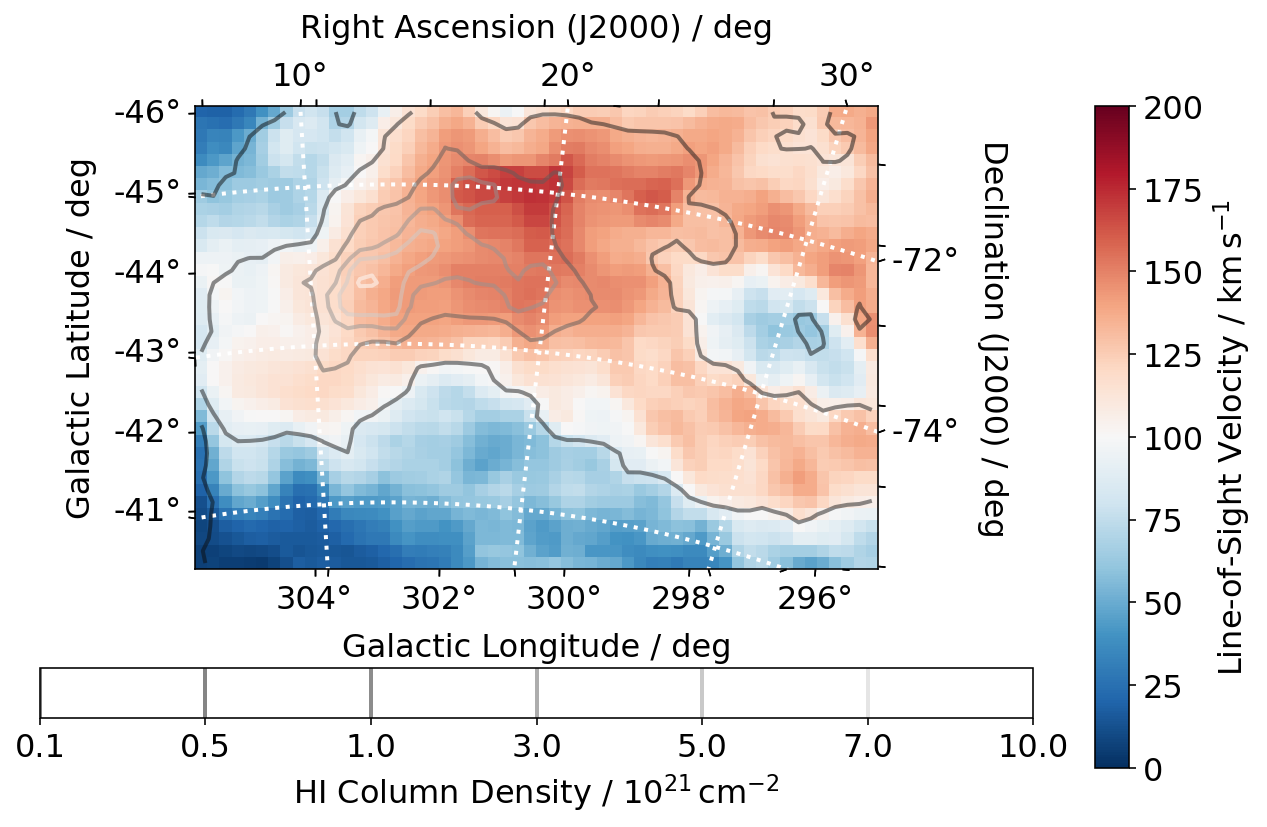

In [80]:
# Let's do some fun plotting! 

fig, ax = plt.subplots(1,1,figsize=(10, 6),subplot_kw={'projection': sub_wcs})

# image = ax.imshow(data_slice, origin='lower', cmap='RdBu_r', aspect='auto')
image = ax.imshow(intensity_weighted_mean_velocity.to(u.km/u.s).value, origin='lower', cmap='RdBu_r', vmin=0, vmax=200)

# Add a colorbar
cbar = plt.colorbar(image, pad = 0.05)
cbar.set_label(r'Line-of-Sight Velocity / $\mathrm{km\,s^{-1}}$', size=16)

# Add axes labels
ax.set_xlabel("Galactic Longitude / deg", fontsize=16)
ax.set_ylabel("Galactic Latitude / deg", fontsize=16)
ax.set_ylim(ax.get_ylim()[::-1])

# Overplot column density contours 
# levels = (1e20, 5e20, 1e21, 3e21, 5e21, 7e21, 1e22)  # Define contour levels to use
levels = (0.1, 0.5, 1, 3, 5, 7, 10)  # Define contour levels to use
contour = ax.contour((hi_column_density / 10**21).value, cmap='Greys_r', alpha=0.5, levels=levels)
# Add a colorbar for the column density contours
cbar2 = plt.colorbar(contour, ax=ax, orientation='horizontal')
cbar2.set_label(r'HI Column Density / $10^{21}\,\mathrm{cm^{-2}}$', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
overlay[0].set_axislabel('Right Ascension (J2000) / deg', fontsize=16)
overlay[1].set_axislabel('Declination (J2000) / deg', fontsize=16)

# contour_legend = matplotlib.lines.Line2D([0], [0], color='gray', lw=2, label='HI Column Density Contours')
# ax.legend(handles=[contour_legend], loc='lower left', fontsize=12)

plt.tight_layout()
plt.savefig('figures/column_density2.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

# This is adjusted from a tutorial of the astropy collaboration: https://learn.astropy.org/tutorials/FITS-cubes.html

## Working with Data Catalogues

### Downloading Data via ADQL/SQL

Remember how we read in a data table from the GALAH survey above with spectroscopic measurements?

The table has the identifier of the 1.8 billion source large Gaia DR3 catalogue in it.

Downloading the full Gaia DR3 catalogue is not useful, but we can use the `astroquery` package to perform a query with the Astronomical Data Query Language (ADQL), an extension of the Structured Query Language (SQL) to include functions when querying data.

Let's try to download the matches in Gaia DR3!

In [81]:
from astroquery.gaia import Gaia

In [82]:
# Extract only the Gaia DR3 source IDs for crossmatching
galah_data['source_id'] = galah_data['dr3_source_id']
gaia_source_ids = galah_data['dr3_source_id'].tolist()

# Convert the source IDs to an Astropy table to use in the query (to not upload too much data)
# with the actual identifier in Gaia DR3 (source_id)
gaia_source_ids_table = Table([gaia_source_ids], names=['source_id'])

# Define and execute the ADQL query to crossmatch with Gaia DR3
query = f"""
SELECT * 
FROM gaiadr3.gaia_source AS gaia
JOIN TAP_UPLOAD.t1 AS galah
ON gaia.source_id = galah.source_id
"""

# Upload the source_id table for crossmatching
job = Gaia.launch_job_async(query=query, upload_resource=gaia_source_ids_table, upload_table_name="t1")
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [83]:
gaiadr3_match[:5]

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,source_id2
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,floa

### Joining 2 catalogues



In [84]:
# fix missing keyword
galah_data['source_id'] = galah_data['dr3_source_id']

In [85]:
from astropy.table import join

gaia_dr3_galah = join(gaiadr3_match, galah_data, keys='source_id')

In [86]:
gaia_dr3_galah

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,source_id2,tmass_id,sobject_id,dr3_source_id,flag_sp,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,snr_c2_iraf
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,floa

/var/folders/g_/1ch053ys79n87jsnqjz0yr_h0000gq/T/ipykernel_45590/1222444252.py:12: RuntimeWarning: invalid value encountered in log10
  data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']/100.),


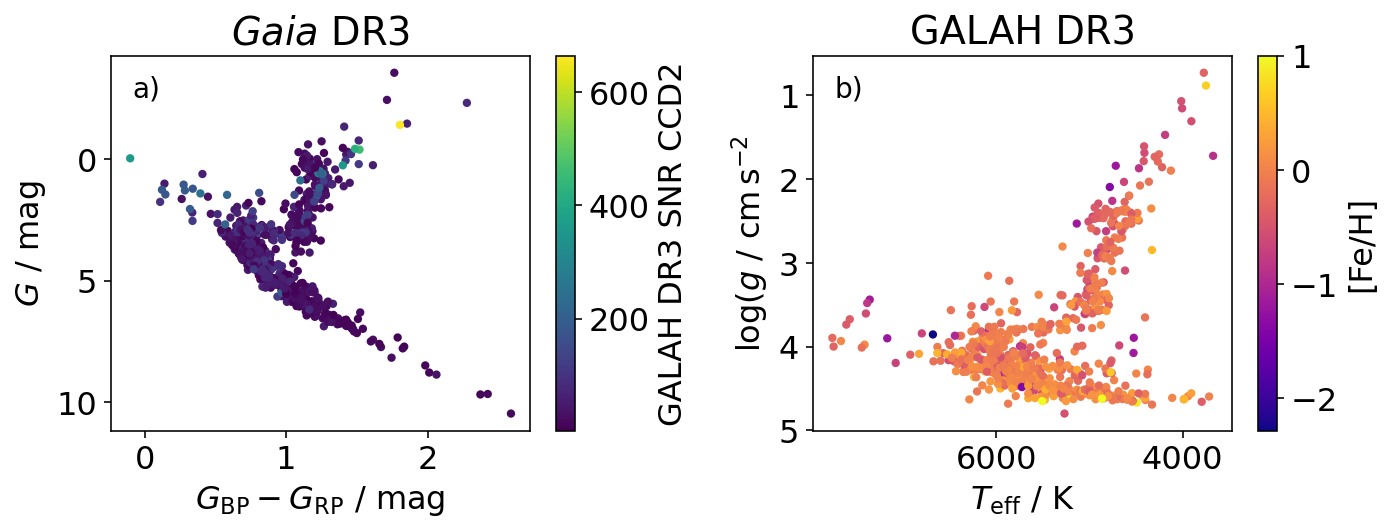

In [87]:
def plot_cmd_and_kiel(data, colormap_left = 'snr_c2_iraf', colormap_left_label = 'GALAH DR3 SNR CCD2'):

    # compare Gaia DR3 and GALAH DR3 measurements
    f, gs = plt.subplots(1, 2, figsize=(10,4))

    # Left panel (Color-Magnitude Diagram, CMD)
    ax = gs[0]
    ax.text(0.05, 0.95, 'a)', transform=ax.transAxes, fontsize=14, ha = 'left', va='top')

    sc = ax.scatter(
        data['bp_rp'],
        data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']/100.), 
        c=data[colormap_left],
        cmap='viridis', s=10
    )
    ax.invert_yaxis()
    ax.set_xlabel(r'$G_\mathrm{BP} - G_\mathrm{RP}~/~\mathrm{mag}$')
    ax.set_ylabel(r'$G~/~\mathrm{mag}$')
    ax.set_title(r'$Gaia$ DR3')

    # Adding a colorbar for SNR in the left panel
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(colormap_left_label)

    # Right panel (Teff-logg diagram)
    ax = gs[1]
    ax.text(0.05, 0.95, 'b)', transform=ax.transAxes, fontsize=14, ha = 'left', va='top')
    sc2 = ax.scatter(
        data['teff'],
        data['logg'], 
        c=data['fe_h'],
        cmap='plasma', s=10
    )
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$')
    ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}}$')
    ax.set_title('GALAH DR3')

    # Adding a colorbar for [Fe/H] in the right panel
    cbar2 = plt.colorbar(sc2, ax=ax)
    cbar2.set_label('[Fe/H]')

    plt.tight_layout()
    plt.show()
    plt.close()
    
plot_cmd_and_kiel(data=gaia_dr3_galah)

### Cleaning Catalogues

Quite often, catalogues do not have all measurements.

Just above, you have seen the error message
```
RuntimeWarning: invalid value encountered in log10
gaia_dr3_galah['phot_g_mean_mag'] + 5 * np.log10(gaia_dr3_galah['parallax']/100.),
```

This message is expected if np.log10() is applied to a value that is not positive (this could be either negative value or value that is "Not a Value" aka NaN). Let's get a first idea:

In [88]:
gaia_dr3_galah['parallax']/100.

0.013934310459647046
-0.00018164889621026796
0.006977634989659194
0.023859753938804067
0.030436543972639386
0.012656012836363719
0.033811291492931564
0.010941586425583212
0.016913735897270757
0.003626404805911553
0.025633736318106056


We already see negative values, but we can also imagine values that are *Not a Number* aka NaN or they might have a bitmask "flag" that indicates their quality.

Negative parallax measurements are true measurements! They just tell us that the source is quite far away. Later in this course how we can use our **prior** knowledge that distances from us have to be positive to still extract something useful out of these measures.

For now, we will simply identify these measurements and not use them to avoid error messages.
For a research paper, this would be a selection cut that has needs to be documented for reproducability!

**NaN entries**  

You can identify NaN entries with the check, e.g. effective temperature $T_\mathrm{eff}$.
If you have checked if a value is NaN, you can also invert the result with a `~` (switch True <-> False):

In [89]:
check_if_parallax_values_finite = np.isfinite(gaia_dr3_galah['parallax'])
check_if_parallax_values_nan = np.isnan(gaia_dr3_galah['parallax'])
check_if_parallax_values_not_fintie = ~np.isfinite(gaia_dr3_galah['parallax'])
check_if_parallax_positive = gaia_dr3_galah['parallax'] > 0

# you can also use the np.where function:
where_parallax_not_positive = np.where(~check_if_parallax_positive==True)

In [90]:
gaia_dr3_galah['parallax'][where_parallax_not_positive]

-0.018164889621026796
-0.16481842755765533
-0.25687467755482574
-0.12074027232455467


**bitmask flags**

A bitmask is a way of storing multiple boolean (True/False) values in a single integer by representing each condition with a different bit in the binary representation of the number. For example, you might use bitmasks in a catalog to encode several flags in a compact form.

You can for example imagine a bitmask flag `0111`, which would add up to `8*0 + 4*1 + 2*1 + 1*1 = 7`. So with just 1 number, you can check for 4 different things!

You can also check if just a specific bitmask is raised:

In [91]:
def is_bit_raised(flag, bit):
    """
    Check if *flag* has the value for a specific *bit* raised
    """
    return (flag & bit) != 0

In GALAH DR3, one of these quality flags is `flag_sp`, which includes a lot of details about quality checks and extra information about a star, for example, if we think it is a binary star.

According to the documentation (Table 4 from https://ui.adsabs.harvard.edu/abs/2021MNRAS.506..150B)
that would mean raised flags 32 (spectroscopic binary) or 64 (photometric binary).

We can find the stars that are flagged as binaries with an `|` check, which means `or`.
You could also find stars that are spectroscopic *and* photometric binaries by replacing `|` with `&`:

In [92]:
check_if_binary = (
    is_bit_raised(gaia_dr3_galah['flag_sp'], 32) &
    is_bit_raised(gaia_dr3_galah['flag_sp'], 64)
)

gaia_dr3_galah['binary'] = check_if_binary

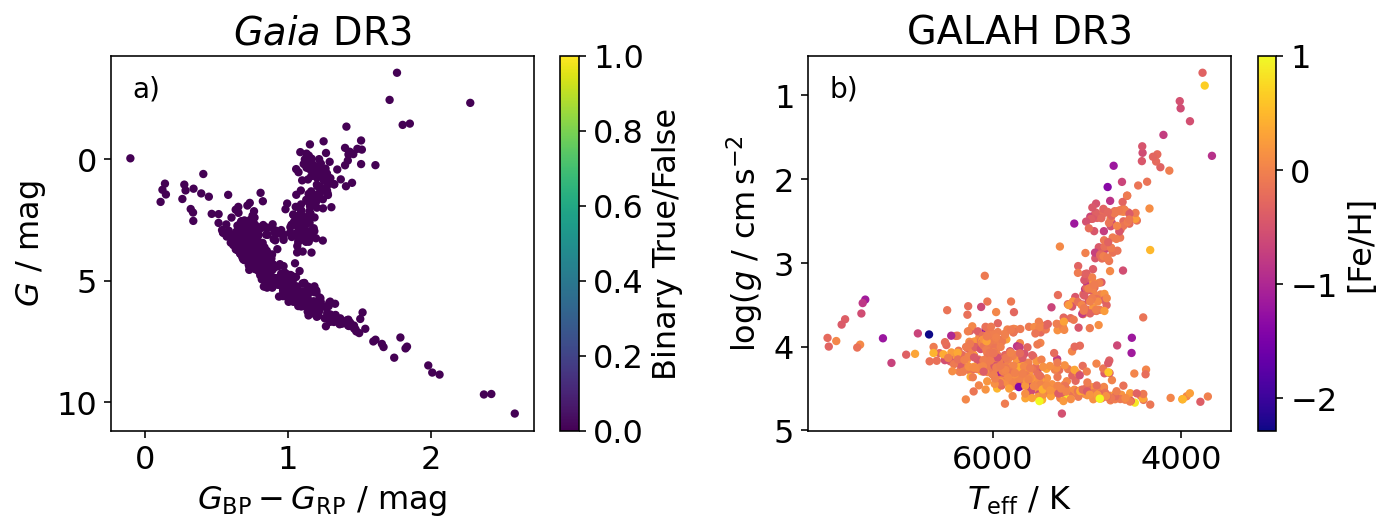

In [93]:
plot_cmd_and_kiel(
    gaia_dr3_galah[check_if_parallax_positive],
    colormap_left='binary',
    colormap_left_label='Binary True/False'
)

### Scaling entries (e.g. for fitting)

You can imagine that any type of optimisation of a function has to start with an initial value.
In some cases, this value might be off by quite a lot and the fitting algorithm might be stuck, or take a lot of time to get close to the final result.

There are 2 ways to improve your situation:
1. Start with a better initial guess  
2. Rescale your values, so that they are between -1 and 1 or scaled to their standard deviation  

Take a look at: https://scikit-learn.org/stable/modules/preprocessing.html

### Visualising targets with ipyaladin

You can find ipyaladin at https://github.com/cds-astro/ipyaladin

In [94]:
from ipyaladin import Aladin
aladin = Aladin()
aladin

# Initialize Aladin and set the view to M67 in 2MASS J color image
aladin = Aladin(target='M67', survey='2MASS-J', fov=0.5)  # Adjust the field of view as needed

# Display Aladin widget
aladin

Aladin(init_options=['_fov', '_target', 'background_color', 'coo_frame', 'full_screen', 'grid_color', 'grid_op…

## Interpolation

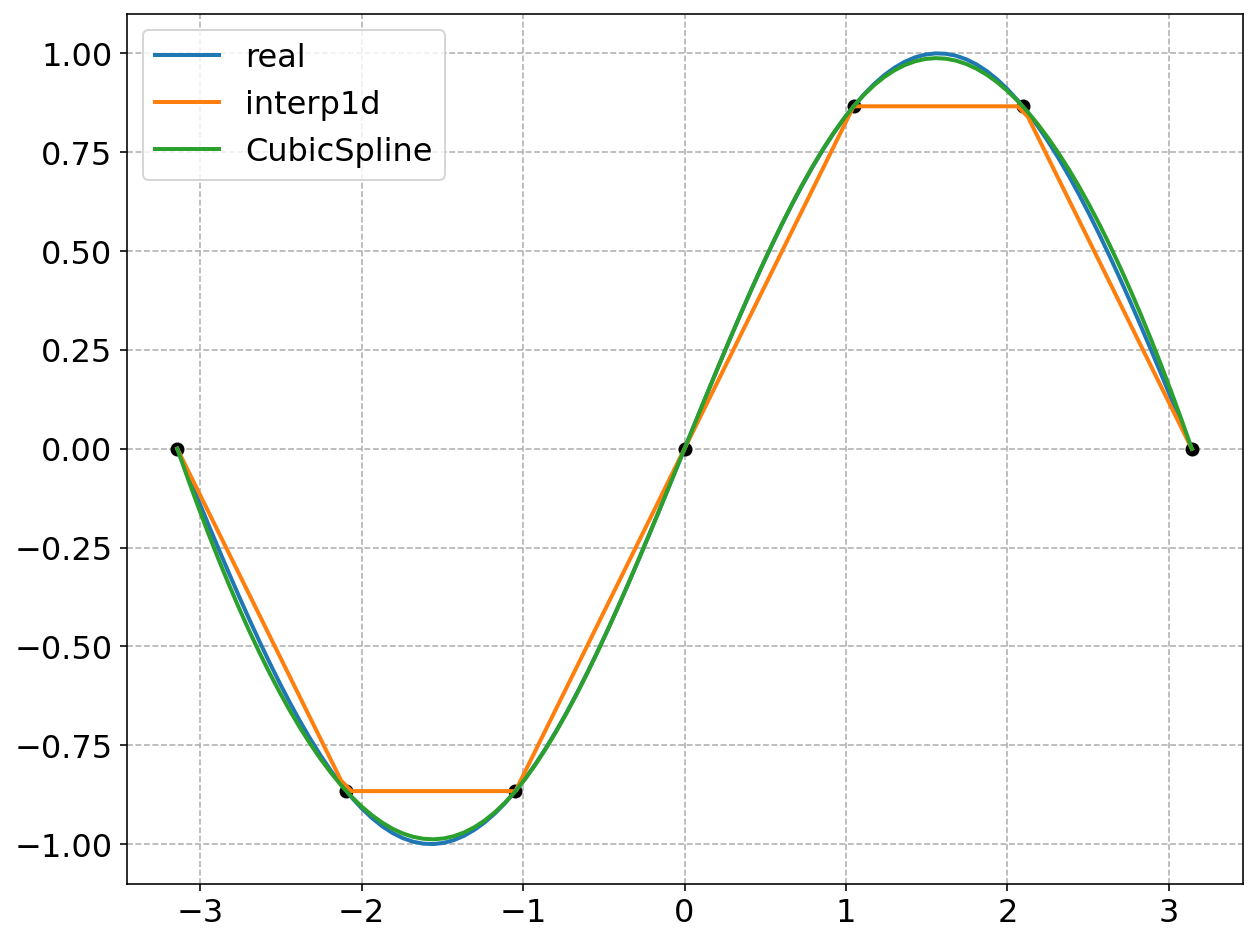

In [95]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

# sample sparse data points from a sine function
sample_x = np.linspace(-np.pi, np.pi, 7)
sample_y = np.sin(sample_x)
plt.plot(sample_x, sample_y, 'ko')

# the true sine function
z = np.linspace(np.min(sample_x), np.max(sample_x), 100)
plt.plot(z, np.sin(z), label='real')

# linear interpolation
f1 = interp1d(sample_x, sample_y)
plt.plot(z, f1(z), label='interp1d')

# cubic spline interpolation
f2 = CubicSpline(sample_x, sample_y)
plt.plot(z, f2(z), label='CubicSpline')

# add legend
plt.legend();
plt.grid(linestyle='--');

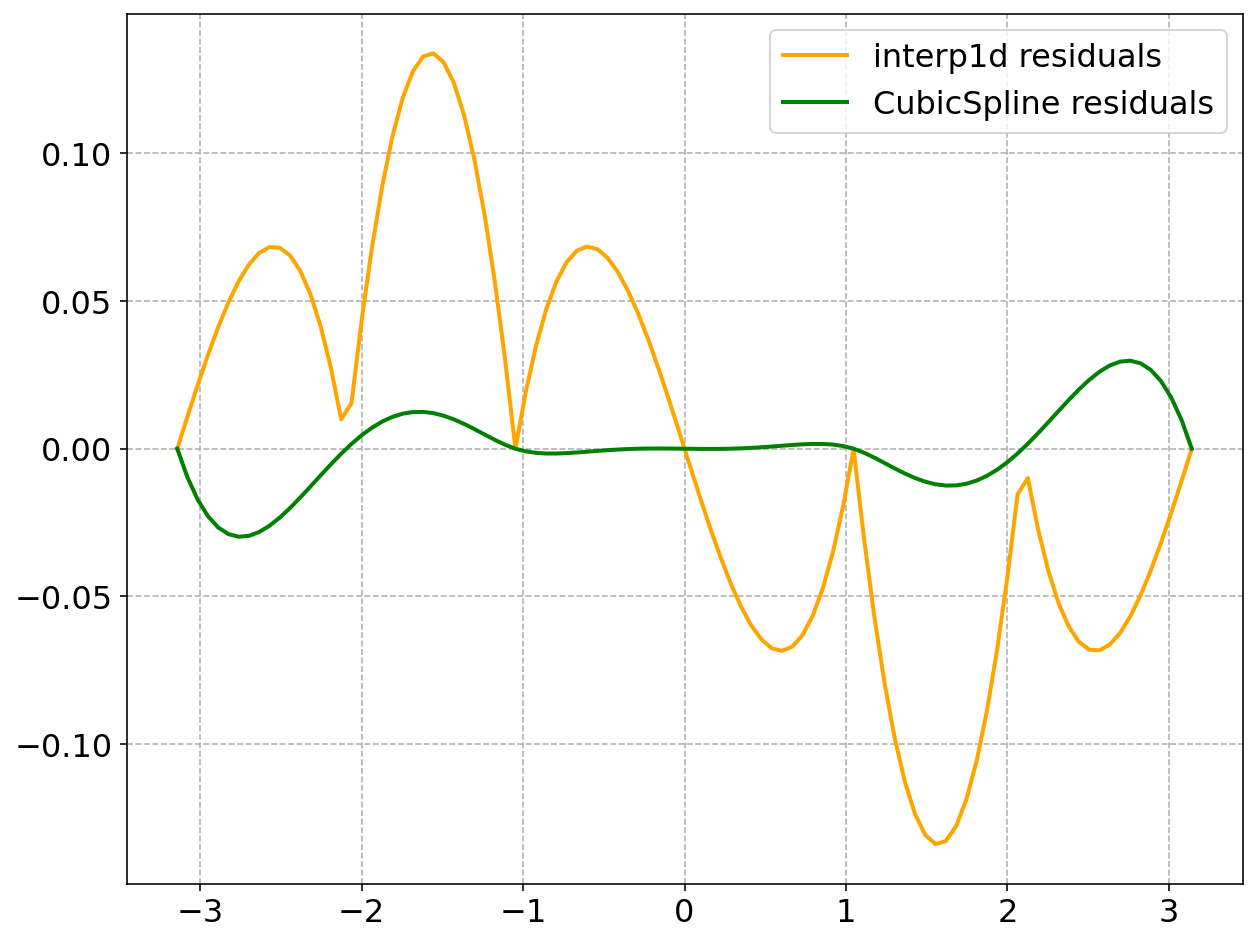

In [96]:
# let's plot the residual
plt.plot(z, f1(z)-np.sin(z), label='interp1d residuals', color='orange')
plt.plot(z, f2(z)-np.sin(z), label='CubicSpline residuals', color='green')
plt.legend();
plt.grid(linestyle='--');

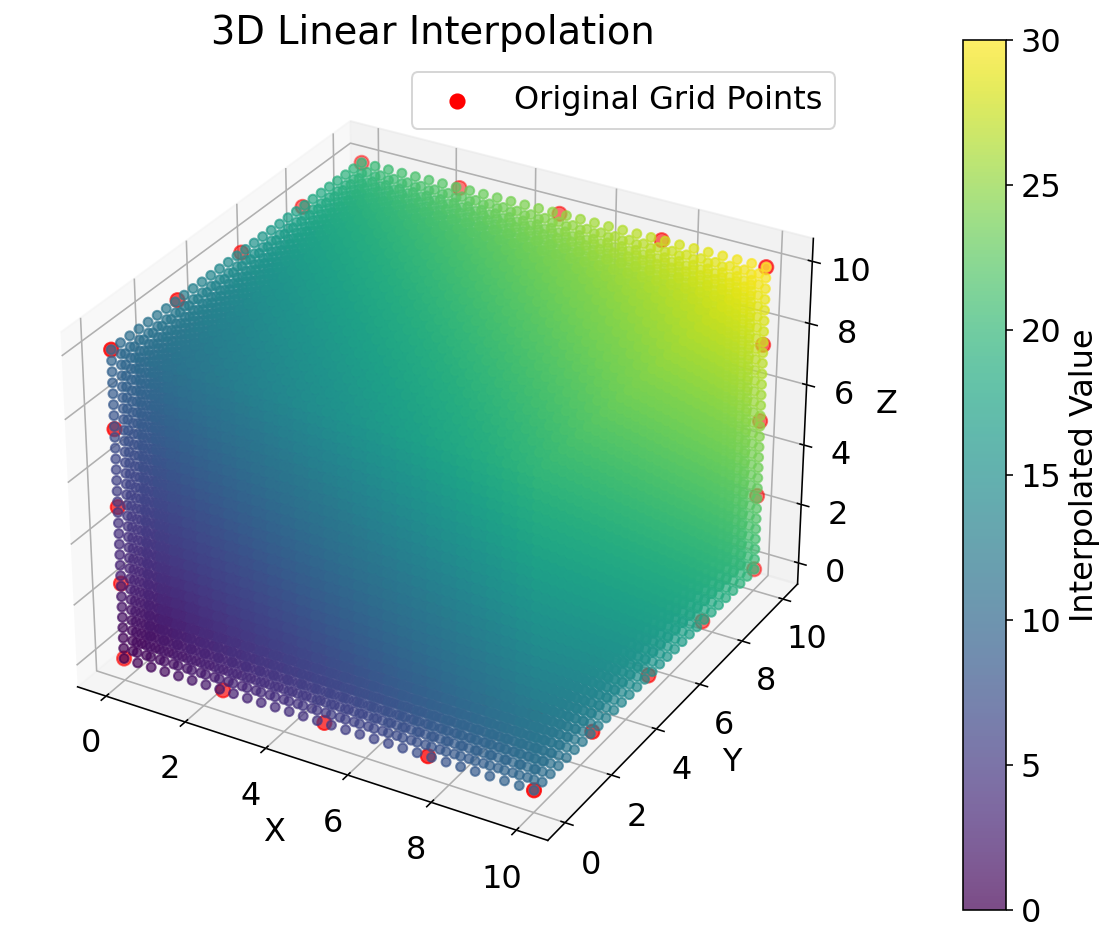

In [97]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example: 3D linear interpolation

# Define the grid points in each dimension
x = np.linspace(0, 10, 5)  # 5 points in the x direction
y = np.linspace(0, 10, 5)  # 5 points in the y direction
z = np.linspace(0, 10, 5)  # 5 points in the z direction

# Create a 3D grid of values (you can replace this with actual data)
# For demonstration, we'll just use the sum of coordinates for simplicity
values = np.zeros((len(x), len(y), len(z)))

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            values[i, j, k] = x[i] + y[j] + z[k]

# Create the interpolator object
interpolator = RegularGridInterpolator((x, y, z), values)

# Generate a finer 3D grid for visualization using interpolation
x_fine = np.linspace(0, 10, 30)
y_fine = np.linspace(0, 10, 30)
z_fine = np.linspace(0, 10, 30)

x_fine_mesh, y_fine_mesh, z_fine_mesh = np.meshgrid(x_fine, y_fine, z_fine)

# Prepare points for interpolation
fine_points = np.array([x_fine_mesh.ravel(), y_fine_mesh.ravel(), z_fine_mesh.ravel()]).T
fine_values = interpolator(fine_points).reshape(x_fine_mesh.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original grid points in red
x_grid, y_grid, z_grid = np.meshgrid(x, y, z, indexing='ij')
ax.scatter(x_grid, y_grid, z_grid, color='red', s=50, label='Original Grid Points')

# Plot interpolated values as a scatter plot on the fine grid
scatter = ax.scatter(x_fine_mesh, y_fine_mesh, z_fine_mesh, c=fine_values, cmap='viridis', alpha=0.7)

# Add color bar for interpolated values
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, label='Interpolated Value')

# Labels and title
ax.set_title('3D Linear Interpolation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()


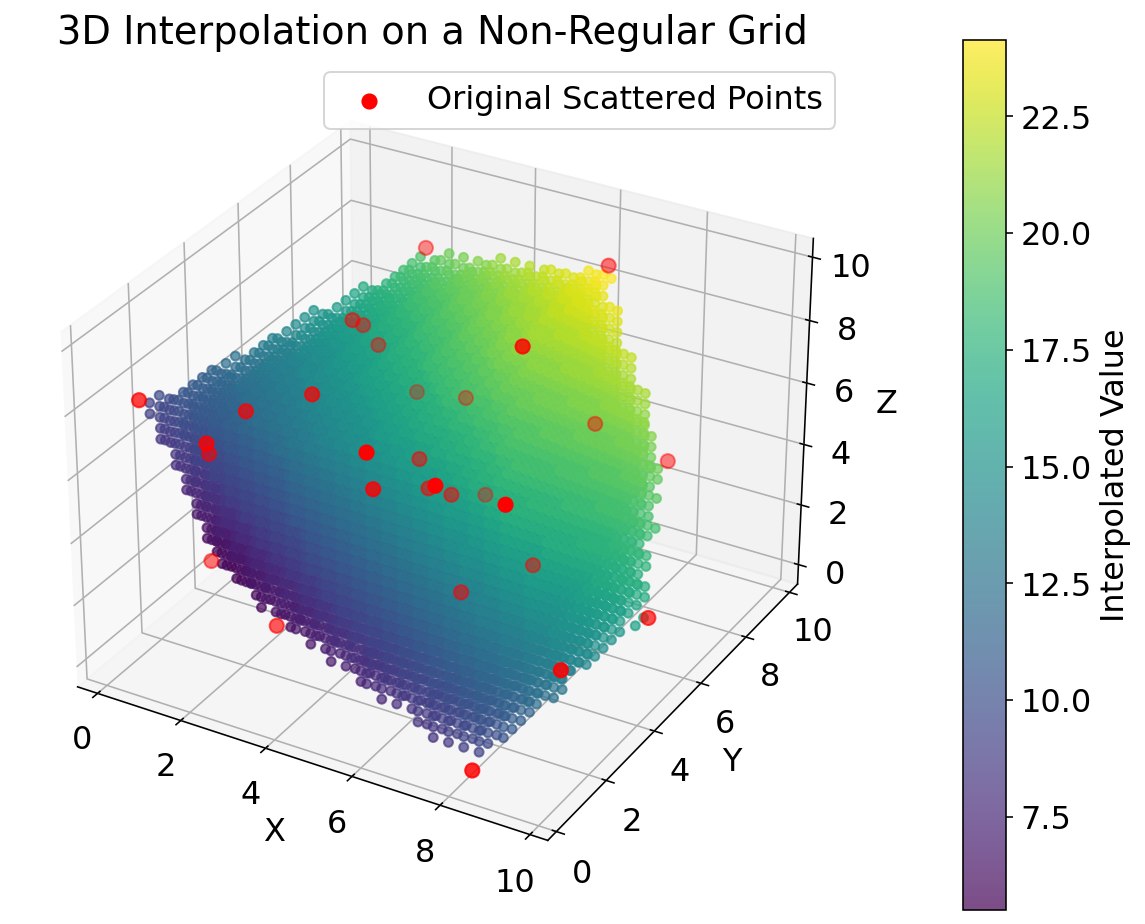

In [98]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example: 3D interpolation on a non-regular grid

# Generate random non-regular grid points in 3D space
np.random.seed(42)
num_points = 30  # Number of scattered data points
x = np.random.uniform(0, 10, num_points)
y = np.random.uniform(0, 10, num_points)
z = np.random.uniform(0, 10, num_points)

# Values at the random grid points (for example, we'll use the sum of the coordinates)
values = x + y + z

# Create the LinearNDInterpolator object for scattered data
interpolator = LinearNDInterpolator(list(zip(x, y, z)), values)

# Generate a finer grid for visualization (in 3D space)
x_fine = np.linspace(0, 10, 30)
y_fine = np.linspace(0, 10, 30)
z_fine = np.linspace(0, 10, 30)

# Meshgrid for finer points
x_fine_mesh, y_fine_mesh, z_fine_mesh = np.meshgrid(x_fine, y_fine, z_fine)

# Prepare the fine points for interpolation
fine_points = np.array([x_fine_mesh.ravel(), y_fine_mesh.ravel(), z_fine_mesh.ravel()]).T

# Perform interpolation at the fine points
fine_values = interpolator(fine_points)

# Reshape the results to match the fine grid shape
fine_values = fine_values.reshape(x_fine_mesh.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scattered grid points in red
ax.scatter(x, y, z, color='red', s=50, label='Original Scattered Points')

# Plot the interpolated values as a scatter plot on the fine grid
# Mask invalid (NaN) values that could occur where interpolation is not defined
valid_mask = ~np.isnan(fine_values)
scatter = ax.scatter(
    x_fine_mesh[valid_mask],
    y_fine_mesh[valid_mask],
    z_fine_mesh[valid_mask],
    c=fine_values[valid_mask],
    cmap='viridis',
    alpha=0.7,
)

# Add a color bar to represent the interpolated values
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, label='Interpolated Value')

# Labels and title
ax.set_title('3D Interpolation on a Non-Regular Grid')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()
